# Clasificación

Un notebook para explicar con Python el problema de la clasificación.
Empezamos por importar las librerías que usaremos

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Paso 1**
Generamos 2 grupos de datos. 

In [4]:
# Clase 0
n0 = 100
mean0 = -3
x0 = np.random.normal(mean0, 1, n0)
y0 = np.random.normal(mean0, 1, n0)

# Clase 1
n1 = 100
mean1 = 3
x1 = np.random.normal(mean1, 1, n1)
y1 = np.random.normal(mean1, 1, n1)


Pintamos nuestros datos para entenderlos mejor

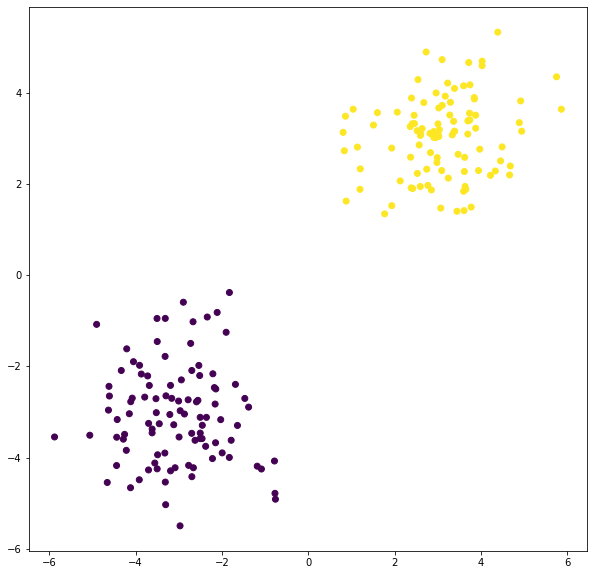

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(np.concatenate((x0, x1), 0), np.concatenate((y0, y1), 0), c=[0] * n0 + [1] * n1)
#plt.scatter([1, 2, 3, 4], [2, 4, 6, 8], c = [0, 0])
plt.show()

Antes de continuar, observe que en python, tenemos varias formas de definir "arreglos". Una de ellas es usando listas nativas y la otra es usando arreglos de numpy. Aunque las 2 sirven para guardar vectores o matrices, debe tener cuidado porque las operaciones básica entre elementos de esos 2 tipos son bien diferentes. Considere el siguiente ejemplo, donde se definen 4 vectores cada uno con 2 elementos, y vea el efecto que tienen las operaciones algebráicas sobre ellos:

In [12]:
# Python list vs Numpy array
l1 = [1, 2]
l2 = [3, 2]
print(l1 * 4) 
print(l1 + l2) 
print(l1)

a1 = np.array([1, 2])
a2 = np.array([3, 4])

print(a1 * 2)
print(a1 + a2)

[1, 2, 1, 2, 1, 2, 1, 2]
[1, 2, 3, 2]
[1, 2]
[2 4]
[4 6]


Note que el operador **+** sobre arreglos de numpy, simplemente suma los elementos de los arreglos, pero el mismo operador sobre listas de python, da como resultado la concatenación de las listas. Si quiere concatenar arreglos de numpy, debe usar la función de **concatenate**. Para entenderla mire el siguiente código:

In [22]:
a1 = np.array([[1, 2], 
               [3, 4]]) # Creamos un vector unidimensional
a2 = np.array([[5, 6], 
               [7, 8]]) # Creamos un vector unidimensional

print("Concatenación vertical, o por filas o en la primera dimensión")
print(np.concatenate((a1, a2), 0))

print("Concatenación horizontal, o por columnas o en la segunda dimensión")
print(np.concatenate((a1, a2), 1))

Concatenación vertical, o por filas o en la primera dimensión
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
Concatenación horizontal, o por columnas o en la segunda dimensión
[[1 2 5 6]
 [3 4 7 8]]


In [23]:
# Un a hipermatriz
ha = np.array([[a1, a2], [a2, a1]])
print(ha.shape)

(2, 2, 2, 2)


**Paso 2**
Generamos un conjunto de datos que usaremos en nuestro ejemplo de clasificación. X, estará compuesto por los pares [x, y] y la clase será 1 para los datos del conjunto (x1, y1) y 0 para los datos del conjunto (x0, y0). Convierta los datos a arreglos de numpy.

In [25]:
X = np.array([np.concatenate((x0, x1), 0), np.concatenate((y0, y1), 0)]).T
Y = np.array([-1] * n0 + [1] * n1)
print(X.shape)
print(Y)

(200, 2)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1]


Un clasificador binario es una funció `prediction(x, f)`
* Si f(x) >=0 entonces C1
* Si f(x) < 0 entonces C2

A f se le llama el modelo.

**Tarea**
Implemente la función de predicción en Python. Suponga que C1 = 1 y  C2 = 0

In [27]:
## INSERTE EL CÓDIGO AQUI
def predictor(x, model):
    if model(x) >= 0:
        return 1
    else:
        return -1
## FIN

In [31]:
# UNIT TEST
def foo(x):
    return x[0] + x[1]
assert predictor([1, 1], foo) == 1
assert predictor([-1, 1], foo) == 1
assert predictor([-1, -1], foo) == -1
assert predictor([-2, 1], foo) == -1
print("Success")

Success


Dado el modelo `model1`, que se da en la siguiente casilla, pruebe que clasificaciones data para los ejemplos [0, 2], [-3, 3.1], [-3, 2.9], [2, 1], [3, -2]

In [32]:
def model1(data):
    return (1 * data[0]) + (-1 * data[1])

In [36]:
## INSERTE EL CÓDIGO AQUI
print(predictor([0,2], model1))
print(predictor([-3, 3.1], model1))
print(predictor([-3, 2.9], model1))
print(predictor([2, 1], model1))
print(predictor([3,-2], model1))
## FIN

-1
-1
-1
1
1


Considere el modelo2. 

In [38]:
def model2(data):
    return (1 * data[0]) + (2 * data[1])

**Paso 3** Use el modelo 1 y el modelo 2, para clasificar todos los datos disponibles en x. Debe obtener una lista, donde cada elementos es la predicción realizada para el ejemplo correspondiente. Al final la lista debe tener el mismo tamaño que **x**, y por consiguiente que **y**

In [40]:
## INSERTE EL CÓDIGO AQUI
pred1 = [predictor(x,model1) for x in X]
pred2 = [predictor(x,model2) for x in X]
#END

print(pred1)
print(pred2)

[-1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

Defina una función de pérdida como se mostró en las diapositivas(Contar cuantas veces se equivoca el modelo)

In [41]:
def perdida(pred, label):
    ## INSERTE EL CÓDIGO AQUI
    lost = [np.abs(x - l) / 2 for x, l in zip(pred, label)]
    return sum(lost)
    # END
    return 0

Use la función de perdida para evaluar los 2 modelos

In [42]:
## INSERTE EL CÓDIGO AQUI
print(perdida(pred1,Y)) # Alrededor de 100
print(perdida(pred2,Y)) # Alrededor de 0
# END

100.0
0.0


¿Cúal de los 2 modelos funciona mejor? ¿Está acorde a nuestro análisis inicial?

# Aprendiendo un clasificador con gradiente descendente

En general, usted no necesita definir un modelo como una función. Usualmente, la función queda definida completamente por sus parámetros, que se pueden representar por un vector. Por ejemplo, el modelo 1 quedaría definido por sus dos multiplicadores [1, -1] y el modelo 2 por el vector [1, 2].

Ahora vamos a implementar el algoritmo de gradiente descendiente, que mostramos en la presentación, para aprender los el vector [w0, w1] que permite clasificar de la mejor manera nuestros datos x, y.

## Paso 1:  Implemente la función gradiente

Como se dedujo en la clase anterior, implemente la función gradiente, que recibe el vector [x0, w1], y el x e y donde lo va a calcular. Nota: x e y pueden ser vectores. La función de perdida será el error cuadrático.

In [50]:
## INSERTE EL CÓDIGO AQUI
def gradientef(wk, sx, sl):
    dw2 = 0
    dw0 = 0
    dw1 = 0
    for x, l in zip(sx, sl):
        g = (wk[0] * x[0] + wk[1] * x [1] + wk[2] - l)
        dw2 += g
        dw0 += g * x[0]
        dw1 += g * x[1]
        
    return np.array([dw0, dw1, dw2])

# END

# Función que queremos aprender
def f(x, wk):
    return wk[0] * x[0] + wk[1] * x[1] + wk[2]
    

## Paso 4:  Implemente el gradiente descendiente

Implemente el algoritmo mostrado en las diapositivas. En cada iteración, muestre el valor de la función de perdida del modelo

In [51]:
# Función de perdida
def perdida2(pred, label):
    lost = [(x - l) * (x - l) / 2 for x, l in zip(pred, label)]
    return sum(lost)
 
# Predice los valores para un conjunto de ejemplos
def predict(w, X):
    return [f(x, w) for x in X]

In [61]:
## INSERTE EL CÓDIGO AQUI
W = np.array([1, -1, 0.5])

k = 0
n = 0.0001
while k < 1000:
    print(perdida2(predict(W, X), Y))
    W = W - n * gradientef(W, X, Y)
    k = k + 1


# END

308.2729972961205
245.66251999251764
217.86062947536828
202.97265043454001
192.9857345236013
184.96318567034976
177.82465912831398
171.16883295941437
164.8429089521981
158.78519172459397
152.9675190808263
147.37420326563924
141.994322732116
136.81889582767096
131.83983984857062
127.04958319974048
122.4409166374194
118.00693219705445
113.74099443786208
109.63672374885051
105.68798430064152
101.88887392257675
98.2337149016982
94.71704532839605
91.33361084352833
88.07835672622994
84.94642029278643
81.93312358862453
79.03396636001345
76.24461929399102
73.56091751598454
70.97885433518758
68.49457522819954
66.10437205182758
63.80467747630192
61.59205963049771
59.463216951076156
57.41497322776822
55.44427283732036
53.54817615890911
51.723855164104485
49.968589174726944
48.27976078219722
46.654851922222406
45.09144009889588
43.58719475251664
42.13987376564929
40.747320102155726
39.40745857413073
38.11829273186706
36.877901872161274
35.68443816045171
34.53612386244981
33.43124868109421
32.36816

5.28943988049856
5.289439761784976
5.289439647489447
5.289439537447442
5.289439431500565
5.289439329496321
5.289439231287898
5.28943913673395
5.289439045698401
5.289438958050254
5.289438873663375
5.289438792416341
5.289438714192255
5.289438638878569
5.2894385663669325
5.289438496553023
5.289438429336418
5.289438364620425
5.289438302311959
5.289438242321398
5.28943818456246
5.289438128952083
5.2894380754102865
5.289438023860082
5.2894379742273445
5.2894379264407
5.289437880431447
5.289437836133428
5.2894377934829695
5.289437752418747
5.289437712881738
5.289437674815101
5.289437638164123
5.2894376028761325
5.289437568900398
5.289437536188102
5.28943750469223
5.289437474367521
5.2894374451704
5.289437417058913
5.28943738999267
5.289437363932787
5.289437338841818
5.289437314683719
5.289437291423789
5.289437269028608
5.289437247466018
5.289437226705038
5.289437206715851
5.289437187469758
5.289437168939113
5.289437151097299
5.289437133918704
5.289437117378654
5.289437101453408
5.289437086120

[ 0.15017083  0.15946698 -0.00203986]
